C:\Users\hector\AppData\Local\Temp\ipykernel_10668\516065680.py:4: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales.csv')


         Serial Number  List Year Date Recorded           Town  \
933             200562       2020    02/03/2021        Danbury   
3905             20880       2020    06/15/2021       Hartford   
4942            200151       2020    12/21/2020       Guilford   
5899            200133       2020    05/03/2021   East Windsor   
6737            200041       2020    12/01/2020   East Windsor   
...                ...        ...           ...            ...   
1003224         220038       2022    10/18/2022       Hartford   
1016523         210533       2021    06/07/2022   East Windsor   
1031076         210059       2021    06/22/2022    Middlefield   
1058529         210412       2021    05/26/2022       Westport   
1061891         210001       2021    10/01/2021  Windsor Locks   

                    Address  Assessed Value  Sale Amount  Sales Ratio  \
933             19  MILL RD        263600.0     415000.0     0.635181   
3905          12 BALDWIN ST         62402.0     200000.0     

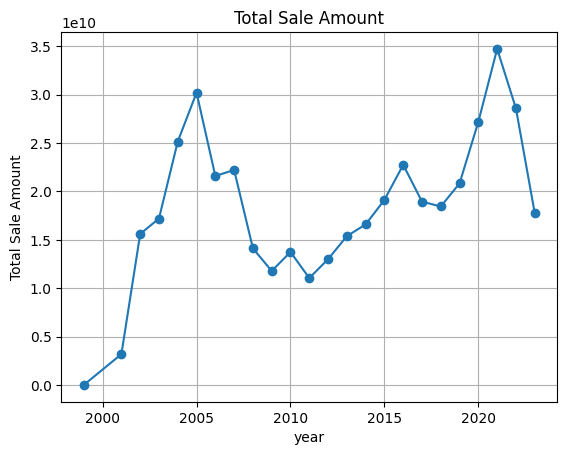

C:\Users\hector\AppData\Local\Temp\ipykernel_10668\516065680.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_range = df.groupby(['year', 'Amount Range'])['Sale Amount'].sum().unstack()


Amount Range        0-200k     200k-500k       500k-1M         1M-5M
year                                                                
1999.0        9.500000e+04  0.000000e+00  0.000000e+00  0.000000e+00
2001.0        1.032246e+09  1.218728e+09  4.676976e+08  3.007207e+08
2002.0        4.047768e+09  5.842831e+09  2.807996e+09  2.118725e+09
2003.0        3.595137e+09  6.075020e+09  3.024984e+09  3.238053e+09
2004.0        4.270330e+09  9.045554e+09  4.831042e+09  4.600120e+09
2005.0        3.907878e+09  1.125598e+10  5.855934e+09  6.153066e+09
2006.0        2.612561e+09  8.837296e+09  4.128769e+09  4.006803e+09
2007.0        1.912068e+09  6.985225e+09  3.803090e+09  5.735626e+09
2008.0        1.682887e+09  4.848626e+09  2.208657e+09  3.266624e+09
2009.0        2.122136e+09  4.574242e+09  1.945040e+09  2.046261e+09
2010.0        2.132318e+09  4.835148e+09  2.500625e+09  3.166788e+09
2011.0        1.798131e+09  3.722669e+09  2.002610e+09  2.363148e+09
2012.0        1.735201e+09  3.6934

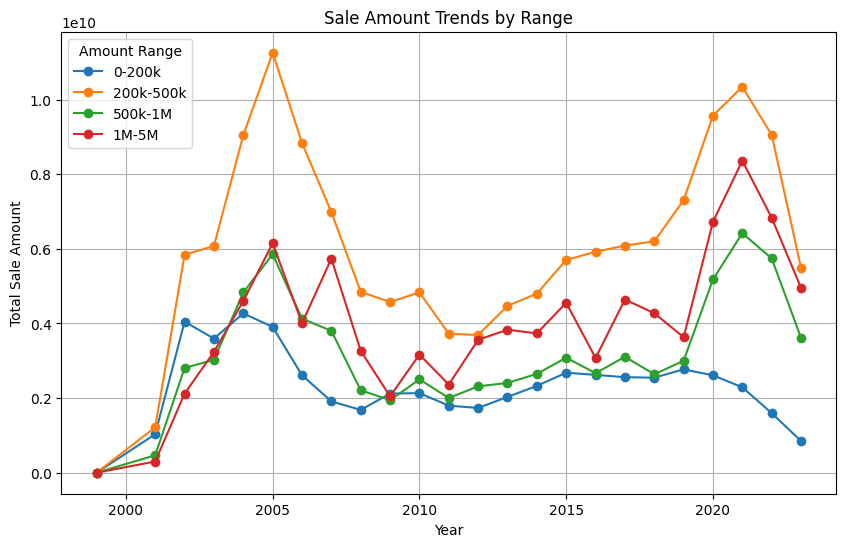

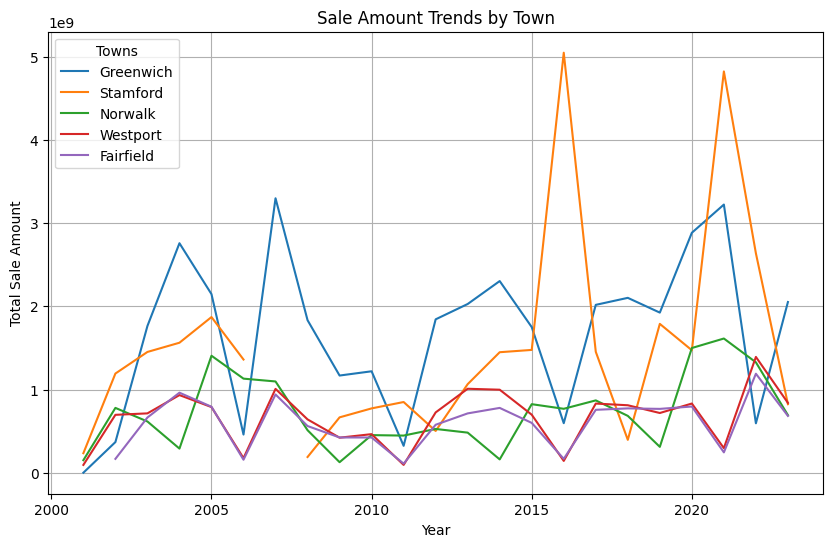

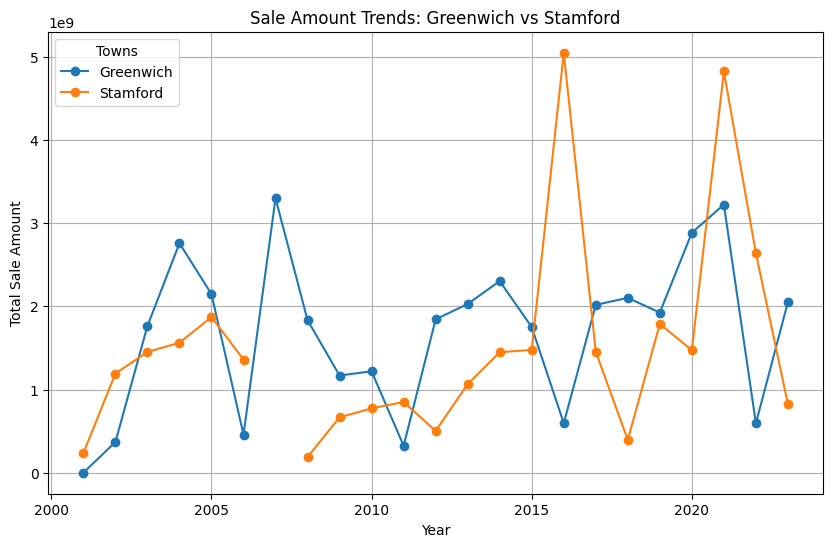

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Real_Estate_Sales.csv')
incorrect_rows = df[df.apply(lambda x: x.astype(str).str.contains('incorrect', case=False, na=False)).any(axis=1)]
print(incorrect_rows)
df = df[~df.apply(lambda x: x.astype(str).str.contains('incorrect', case=False, na=False)).any(axis=1)]

print(df.info())

df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

df['year']  = df['Date Recorded'].dt.year

sales_by_years = df.groupby('year')['Sale Amount'].sum()

sales_by_years.plot(kind='line', marker='o')
plt.title('Total Sale Amount')
plt.xlabel('year')
plt.ylabel('Total Sale Amount')
plt.grid()
plt.show()

bins = [0,200000, 500000, 1000000, 5000000]
labels = ['0-200k', '200k-500k', '500k-1M', '1M-5M']

df['Amount Range'] =  pd.cut(df['Sale Amount'], bins=bins, labels=labels)

sales_by_range = df.groupby(['year', 'Amount Range'])['Sale Amount'].sum().unstack()
print(sales_by_range)

sales_by_range.plot(kind='line', marker='o', figsize = (10,6))
plt.title('Sale Amount Trends by Range')
plt.xlabel('Year')
plt.ylabel('Total Sale Amount')
plt.legend(title = 'Amount Range')
plt.grid()
plt.show()


sales_by_town = df.groupby(['year', 'Town'])['Sale Amount'].sum().unstack()

top_towns = sales_by_town.sum().sort_values(ascending=False).head(5).index

sales_by_town[top_towns].plot(kind='line', figsize=(10,6))

plt.title('Sale Amount Trends by Town')
plt.xlabel('Year')
plt.ylabel('Total Sale Amount')
plt.legend(title='Towns')
plt.grid()
plt.show()


key_towns = ['Greenwich', 'Stamford']
sales_by_town[key_towns].plot(kind='line', figsize=(10,6), marker='o')
plt.title('Sale Amount Trends: Greenwich vs Stamford')
plt.xlabel('Year')
plt.ylabel('Total Sale Amount')
plt.legend(title='Towns')
plt.grid()
plt.show()


## Observetion:
the data for stamford shows gaps betweem 2005 and 2010, which may affect the trend accuracy for this period.

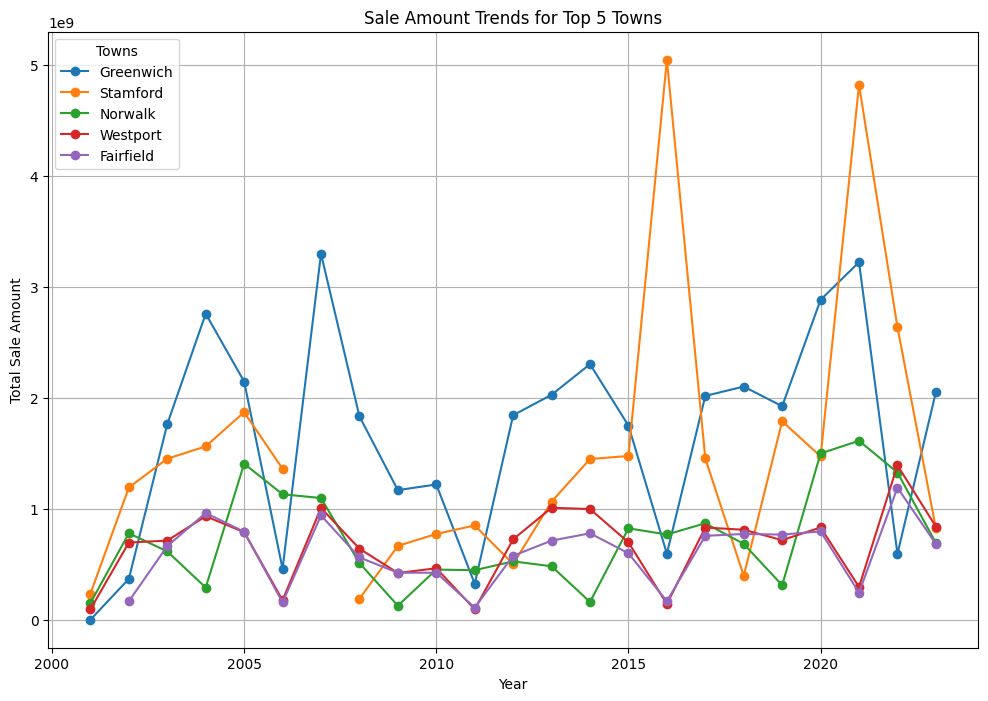

In [11]:
sales_by_town[top_towns].plot(kind='line',figsize=(12,8), marker='o')
plt.title('Sale Amount Trends for Top 5 Towns')
plt.xlabel('Year')
plt.ylabel('Total Sale Amount')
plt.legend(title='Towns')
plt.grid()
plt.show()

**Greenwich**: The real estate market in Greenwich shows periodic highs and lows, possibly due to fluctuating demand for high-value properties. It may indicate an inconsistent Luxury Market.
**Stamford**: Stamford exhibits significant oscillations in sale amounts over time, suggesting volatility in property sales or market conditions.
**Norwalk, Westport, Fairfield**: The analysis of Norwalk, Westport, and Fairfield demonstrates stable trends, with fewer fluctuations, indicating balanced or predictable markets."


C:\Users\hector\AppData\Local\Temp\ipykernel_10668\2687581892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_town_range = df.groupby(['Town', 'Amount Range'])['Sale Amount'].sum().unstack()


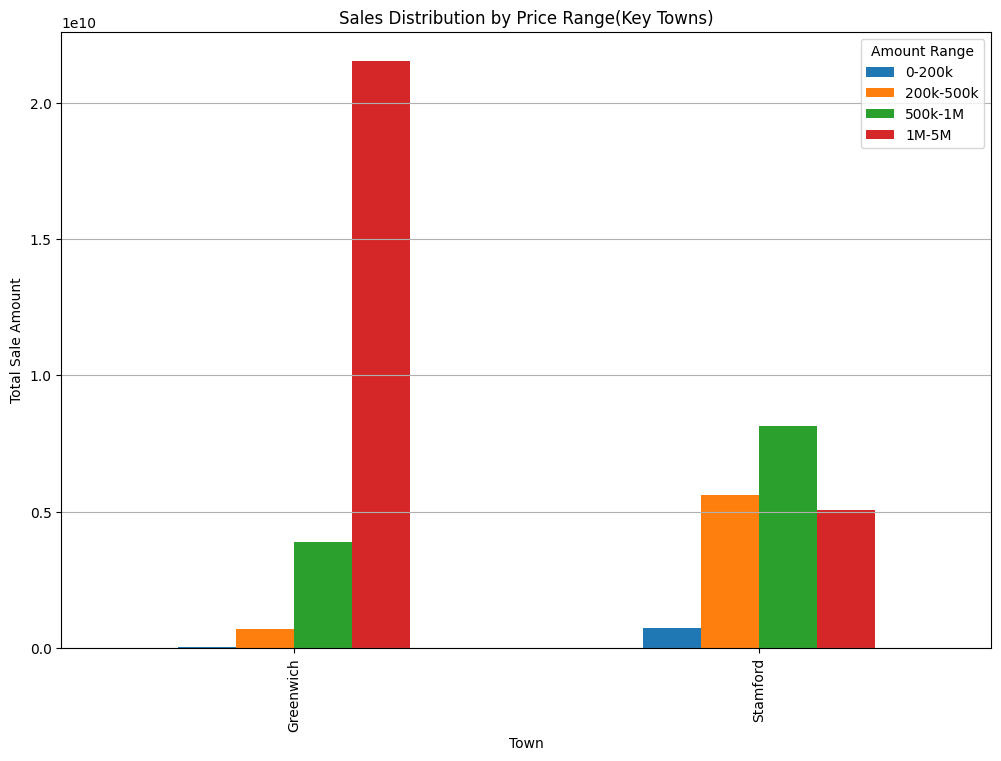

In [12]:
sales_by_town_range = df.groupby(['Town', 'Amount Range'])['Sale Amount'].sum().unstack()

sales_by_town_range.loc[key_towns].plot(kind='bar', figsize= (12,8))
plt.title('Sales Distribution by Price Range(Key Towns)')
plt.xlabel('Town')
plt.ylabel('Total Sale Amount')
plt.legend(title='Amount Range')
plt.grid(axis='y')
plt.show()

Sales in the 200k-500k range dominate across most towns, but the 1M-5M range contributes significantly in Greenwich.

## Final Summary
this analysis of real estate sales trends reveal several key insights:

1. **Overall Market Trends**: Sale amounts have shown a steady increase over time, with occasional dips in certain years.
2. **Price Range Analysis**: The majority of sales occur in the 0-200k range, but high-value properties (1M-5M) contribute significantly in towns like Greenwich.
3. **Town-Specific Trends**:
   -**Greenwich**: Periodic highs and lows, indicating a fluctuating Luxury Market.
   -**Stamford**: High volatility, possibly due to varying property types and inconsistent demand.
   -**Norwalk, Westport, Fairfield**: Stable trends with smaller oscillations, representing balanced markets.

These findings can guide real estate firms in tailoring their strategies to specific towns and price ranges, enabling more effective marketing and investment decisions.